Found 18748 images belonging to 118 classes.
Found 590 images belonging to 118 classes.
Found 590 images belonging to 118 classes.


c:\Users\jmare\OneDrive\Documents\Clicker\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100


c:\Users\jmare\OneDrive\Documents\Clicker\.conda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1171/1171 ━━━━━━━━━━━━━━━━━━━━ 143s 120ms/step - accuracy: 0.0117 - loss: 4.7539 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0104 - val_loss: 4.9177 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 0s 104us/step - accuracy: 0.0000e+00 - loss: 2.2045 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0714 - val_loss: 2.5556 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100


c:\Users\jmare\OneDrive\Documents\Clicker\.conda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1171/1171 ━━━━━━━━━━━━━━━━━━━━ 134s 114ms/step - accuracy: 0.0354 - loss: 4.4336 - precision: 0.1295 - recall: 1.7573e-04 - val_accuracy: 0.0156 - val_loss: 5.1496 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - accuracy: 0.1250 - loss: 1.9312 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 2.7810 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 136s 115ms/step - accuracy: 0.0738 - loss: 4.0608 - precision: 0.2951 - recall: 0.0016 - val_accuracy: 0.0052 - val_loss: 5.7748 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/100
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 0s 72us/step - accuracy: 0.1250 - loss: 1.9838 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 2.5529 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 7/100
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 135s 114ms/step - accuracy: 0.0992 - loss: 3.86

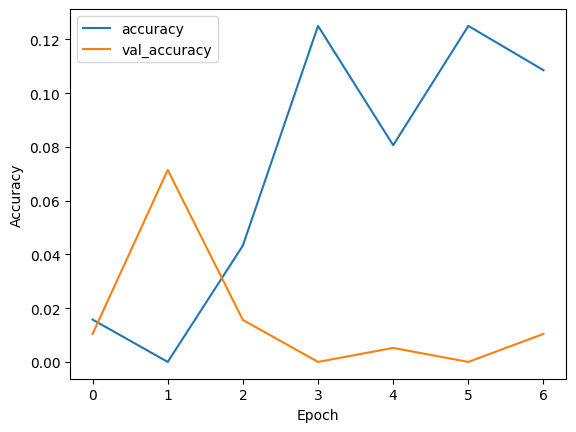

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Define the paths to the train, valid, and test folders
train_data_dir = '../P4/train'
valid_data_dir = '../P4/valid'
test_data_dir = '../P4/test'

# Define image dimensions and batch size
img_height, img_width = 128, 128
batch_size = 16  # Decrease the batch size

# Create ImageDataGenerator for data augmentation and normalization
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],  # Randomly adjust brightness between 0.5 and 1.5
    channel_shift_range=50.0,      # Randomly shift color channels by up to 50
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input  # Apply VGG16 preprocessing function
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

# Generate training data with data augmentation
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generate validation data
valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generate test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',   # Monitor validation accuracy
    patience=5,                # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best validation accuracy
)

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),  # Add another convolutional layer
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model with Adam optimizer and learning rate 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,  # Increase the number of epochs
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    callbacks=[early_stopping]  # Add early stopping callback
)

# Evaluate the model on test data
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

# Perform predictions on test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Map predicted class indices to class labels
predicted_labels = [class_labels[i] for i in predicted_classes]

# Print some sample predictions
print("Sample Predictions:")
for i in range(min(10, len(predicted_labels))):
    print(f"Prediction: {predicted_labels[i]}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
